In [2]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [105]:
x = range(69)
y = [3.55, 3.52, 3.46, 3.49,3.51, 3.17, 2.99, 2.97,2.97, 3.04, 3.01, 3.02,3.01, 3.09, 3.32, 3.24,
3.20, 3.25, 3.28, 3.45,3.46, 3.26,3.42, 3.51,3.46, 3.66,4.03, 3.94,4.00, 4.32,4.59, 4.63,4.70, 5.03,
5.57, 6.09,6.54, 6.64,6.74,6.79,6.97,7.20,7.17,7.16,7.15,7.19,7.23,7.41,7.56,7.74,7.79,7.64,7.80,7.99,
8.06,8.02,8.09,8.05,8.30,8.55,8.45,8.23,8.18,8.14,8.25,8.25,8.18,7.92,7.59]
n = len(x)

In [28]:
def D(k,j):
    if k == 0:
        return y[j]
    else:
        return((D(k-1,j+1) - D(k-1,j))/(x[j+k]-x[j]))

In [29]:
def D(k,j):
    return sum(y[m]*np.prod([1/(x[m]-x[i]) for i in range(j,j+k+1) if i != m]) for m in range(j,j+k+1))

In [30]:
D_ = [D(k,0) for k in range(1,n)]

In [31]:
def prod(lista):
    if len(lista) == 0:
        return 1
    else:
        return prod(lista[:-1])*lista[-1]

In [32]:
Ln = lambda z: y[0] + sum([D_[k-1]*np.prod([z-x[i] for i in range(k)]) for k in range(1,n)])

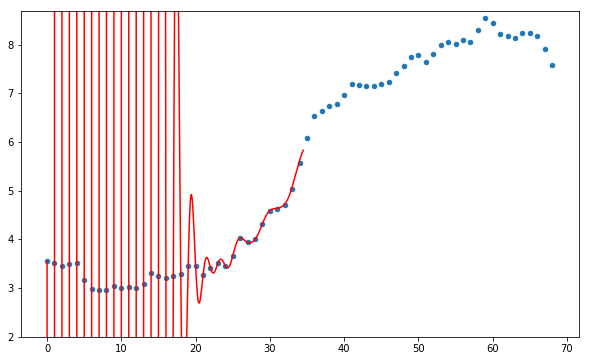

In [33]:
_ = plt.figure(figsize=(10,6))
_ = plt.ylim((2,8.7))
_ = plt.plot(np.linspace(0,69*0.5,500),[Ln(z) for z in np.linspace(0,69*0.5,500)],color='red')
_ = plt.scatter(x,y,s=20)

In [3]:
def B3(x):
    if abs(x)<=1:
        return (1/6)*((2-abs(x))**3-4*(1-abs(x))**3)
    elif abs(x)<=2:
        return (1/6)*(2-abs(x))**3
    else:
        return 0

In [93]:
x = range(4)
y = [5,6,4,3]

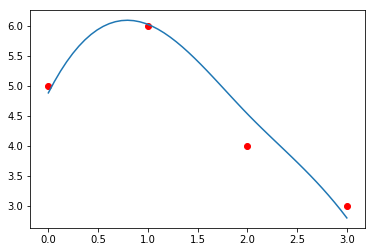

In [50]:
plt.plot(np.linspace(0,3,50),[5.7*B3(z) + 6.52*B3(z-1) + 4.4*B3(z-2) +3.1*B3(z-3) for z in np.linspace(0,3,50)])
plt.scatter(x,y,color='red')

In [107]:
Y = np.matrix(y)
A = np.matrix([[B3(x[i]-x[j]) for i in range(n)] for j in range(n)])
alpha = Y*np.linalg.inv(A)
S = lambda z: sum([alpha[0,i]*B3(z-x[i]) for i in range(n)])

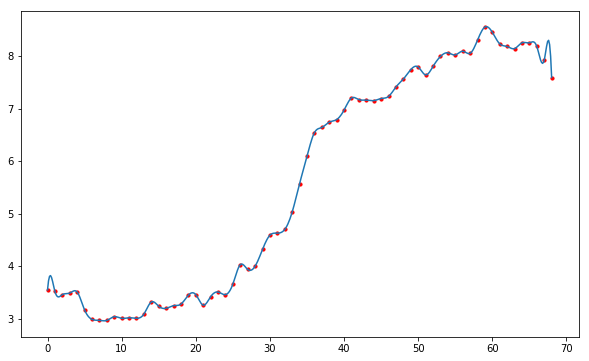

In [120]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,n-1,500),[S(z) for z in np.linspace(0,n-1,500)])
plt.scatter(x,y,color='red',s=10)

In [15]:
def BSplines(x,y):
    Y = np.matrix(y)
    n = len(x)
    A = np.matrix([[B3((x[i]-x[j])/10000) for i in range(n)] for j in range(n)])
    alpha = Y*np.linalg.inv(A)
    S = lambda z: sum([alpha[0,i]*B3((z-x[i])/10000) for i in range(n)])
    _ = plt.figure(figsize=(10,6))
    _ = plt.plot(np.linspace(x[0],x[n-1],500),[S(z) for z in np.linspace(x[0],x[n-1],500)])
    _ = plt.scatter(x,y,color='red',s=10)
    _ = plt.show()

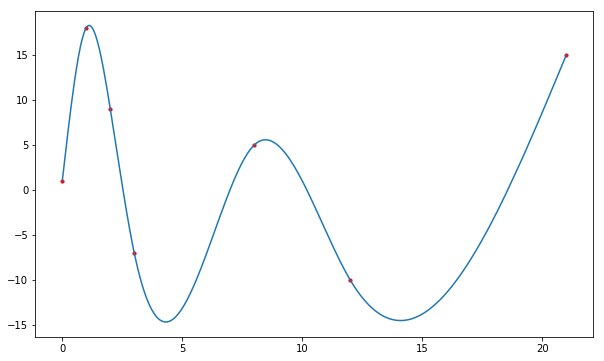

In [16]:
BSplines([0,1,2,3,8,12,21],[1,18,9,-7,5,-10,15])